In [1]:
# Importing Necessary Libraraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  
# Importing ML Libraries and Algorithim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import mean_absolute_error ,r2_score

In [2]:
#Importing the Dataset
df=pd.read_csv("Indian House Prices.csv")

In [3]:
# View of Data
df

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,24599,620.00,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.00,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.00,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.00,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


## Lets Analyze the Dataset First

In [5]:
#Top 5 value of Dataset
df.head()


,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [6]:
#Lowest values of Dataset
df.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
9385,24599,620.0,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.0,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.0,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.0,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182
9389,24603,140.0,1183,Airoli,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


In [7]:
#Size of dataset
df.shape

(9390, 44)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

In [9]:
df.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,11149.285091,105.614563,1354.274973,2.472311,0.352183,0.171778,0.509904,0.405644,0.342279,0.320554,...,0.296166,0.049414,0.022258,0.056550,0.053248,0.051544,0.021832,0.051864,18.778749,74.315855
std,7292.839800,139.664066,719.154146,0.762603,0.477676,0.377208,0.499929,0.491042,0.474498,0.466714,...,0.456589,0.216743,0.147528,0.230992,0.224540,0.221117,0.146142,0.221764,7.554944,18.613870
min,0.000000,20.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.816624,-117.147666
25%,5957.250000,45.000000,924.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.980165,77.036315
50%,10828.500000,70.000000,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.451210,77.746994
75%,16088.750000,122.000000,1610.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.227342,79.922469
max,24603.000000,4000.000000,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.447377,127.655678


In [10]:
df["City"].value_counts().sort_values()

City
Kolkata        68
Mumbai       1302
Banglore     1708
Delhi        1989
Chennai      2047
Hyderabad    2276
Name: count, dtype: int64

In [11]:
df["City"].sample(20)

8151       Mumbai
547      Banglore
4807        Delhi
6156    Hyderabad
3284      Chennai
2279      Chennai
4885        Delhi
8139       Mumbai
6897    Hyderabad
3540      Chennai
3900        Delhi
7885    Hyderabad
2683      Chennai
4751        Delhi
147      Banglore
1065     Banglore
8660       Mumbai
8788       Mumbai
1074     Banglore
4052        Delhi
Name: City, dtype: object

## Now lets clean our Data

In [13]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
len(df.columns)

44

### -Remove not usefull columns

In [16]:
DF = df[['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom','City','Hospital','Gasconnection']]
DF.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,City,Hospital,Gasconnection
0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0
1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0
2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0
3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0
4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Banglore,0.0,0.0


In [17]:
DF.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'City', 'Hospital', 'Gasconnection'],
      dtype='object')

In [18]:
len(DF.columns)

27


### Rename some Columns

In [20]:
DF.rename(columns={'Area':'total_sqft', 'Location':'Area', 'No. of Bedrooms':'BHK', 'CarParking':'Parking', 'LiftAvailable':'Lift', '24X7Security':'Security'}, inplace=True)
DF.head()

,Price,total_sqft,Area,BHK,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,School,Security,PowerBackup,Parking,StaffQuarter,Cafeteria,MultipurposeRoom,City,Hospital,Gasconnection
0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0
1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0
2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0
3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0
4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Banglore,0.0,0.0


In [21]:
DF.columns

Index(['Price', 'total_sqft', 'Area', 'BHK', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security',
       'PowerBackup', 'Parking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'City', 'Hospital', 'Gasconnection'],
      dtype='object')

### Adding an extra column for price per square feet.

In [23]:
DF['Price_per_sqft'] = (DF['Price']*100000/DF['total_sqft']).round()
DF

,Price,total_sqft,Area,BHK,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Security,PowerBackup,Parking,StaffQuarter,Cafeteria,MultipurposeRoom,City,Hospital,Gasconnection,Price_per_sqft
0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0,8982.0
1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0,4990.0
2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0,4099.0
3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0,5571.0
4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,Banglore,0.0,0.0,7994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,620.00,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,Mumbai,0.0,1.0,42759.0
9386,25.00,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,0.0,0.0,4630.0
9387,190.00,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,Mumbai,0.0,0.0,14996.0
9388,149.00,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,Mumbai,0.0,1.0,11968.0


In [24]:
# Assume the price is in USD and we want to convert it to Indian Rupees (INR)
exchange_rate = 83  # Example exchange rate: 1 USD = 83 INR

# Create a new 'Indian Price' column by converting the 'Price' column to INR
DF['Indian_Price'] = (DF['Price'] * exchange_rate).round()

# Show the updated DataFrame
DF

,Price,total_sqft,Area,BHK,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,PowerBackup,Parking,StaffQuarter,Cafeteria,MultipurposeRoom,City,Hospital,Gasconnection,Price_per_sqft,Indian_Price
0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0,8982.0,24900.0
1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Banglore,0.0,0.0,4990.0,6937.0
2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0,4099.0,5681.0
3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,Banglore,0.0,0.0,5571.0,5642.0
4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,Banglore,0.0,0.0,7994.0,16600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,620.00,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,Mumbai,0.0,1.0,42759.0,51460.0
9386,25.00,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Mumbai,0.0,0.0,4630.0,2075.0
9387,190.00,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,Mumbai,0.0,0.0,14996.0,15770.0
9388,149.00,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,Mumbai,0.0,1.0,11968.0,12367.0


In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                9390 non-null   float64
 1   total_sqft           9390 non-null   int64  
 2   Area                 9390 non-null   object 
 3   BHK                  9390 non-null   float64
 4   Resale               9390 non-null   int64  
 5   MaintenanceStaff     9390 non-null   float64
 6   Gymnasium            9390 non-null   float64
 7   SwimmingPool         9390 non-null   float64
 8   LandscapedGardens    9390 non-null   float64
 9   JoggingTrack         9390 non-null   float64
 10  RainWaterHarvesting  9390 non-null   float64
 11  IndoorGames          9390 non-null   float64
 12  ShoppingMall         9390 non-null   float64
 13  Intercom             9390 non-null   float64
 14  SportsFacility       9390 non-null   float64
 15  ATM                  9390 non-null   f

In [26]:
DF["School"].value_counts()

School
0.0    8729
1.0     661
Name: count, dtype: int64

In [27]:
DF["Hospital"].value_counts()

Hospital
0.0    8880
1.0     510
Name: count, dtype: int64

In [28]:
DF["Gasconnection"].value_counts()

Gasconnection
0.0    7713
1.0    1677
Name: count, dtype: int64

In [29]:
DF["City"].value_counts()

City
Hyderabad    2276
Chennai      2047
Delhi        1989
Banglore     1708
Mumbai       1302
Kolkata        68
Name: count, dtype: int64

In [30]:
#Checking Null Values
DF.isnull().sum()

Price                  0
total_sqft             0
Area                   0
BHK                    0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
Security               0
PowerBackup            0
Parking                0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
City                   0
Hospital               0
Gasconnection          0
Price_per_sqft         0
Indian_Price           0
dtype: int64

In [31]:
DF["Area"]

0       JP Nagar Phase 1
1           Doddanekundi
2                Kengeri
3               Horamavu
4            Thanisandra
              ...       
9385               Worli
9386          Virar East
9387             Belapur
9388              Airoli
9389              Airoli
Name: Area, Length: 9390, dtype: object

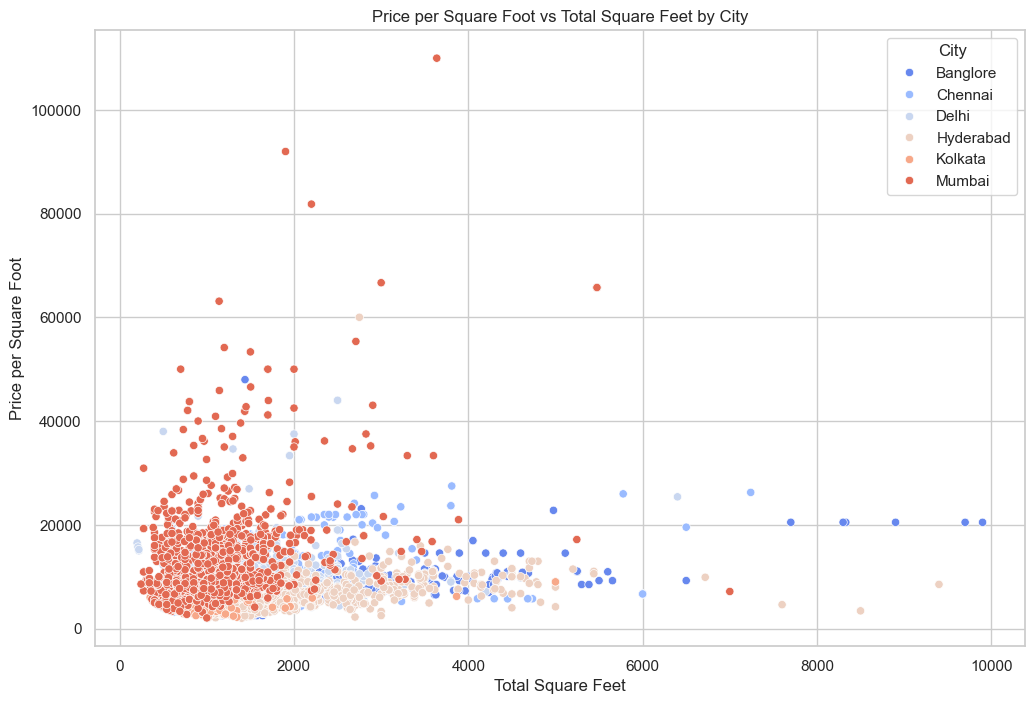

In [32]:
# Assuming F is your DataFrame
# Set the plot style
sns.set(style="whitegrid")

# 8. Price per square foot analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_sqft', y='Price_per_sqft', data=DF, hue='City', palette="coolwarm")
plt.title('Price per Square Foot vs Total Square Feet by City')
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Foot')
plt.show()


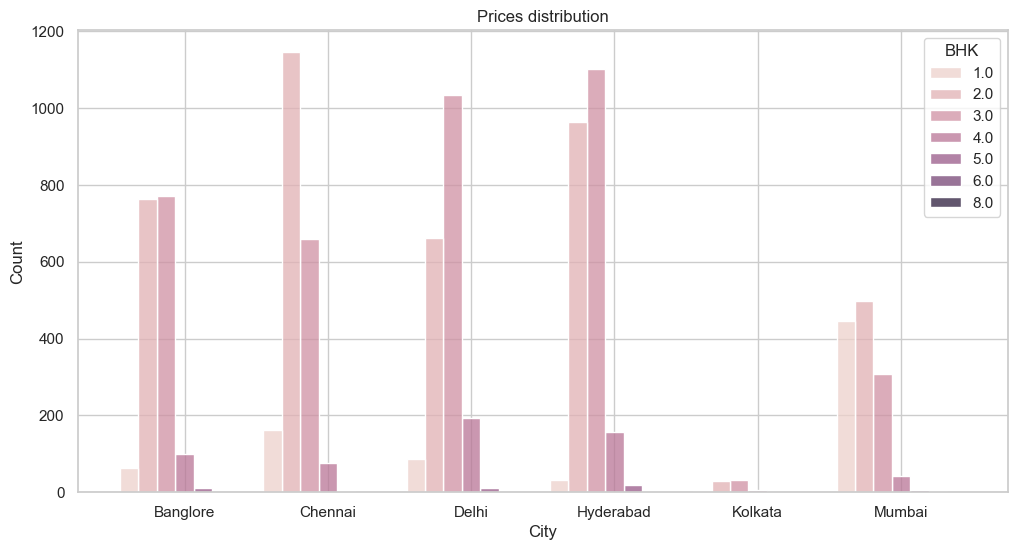

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data=DF, x='City', hue='BHK', multiple='dodge', shrink=.9)
plt.title('Prices distribution')
plt.show()

In [34]:
DF.sort_values(by=['Price'], ascending=False).head(20)

,Price,total_sqft,Area,BHK,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,PowerBackup,Parking,StaffQuarter,Cafeteria,MultipurposeRoom,City,Hospital,Gasconnection,Price_per_sqft,Indian_Price
8992,4000.0,3638,Worli,4.0,1,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,Mumbai,0.0,0.0,109951.0,332000.0
8926,3600.0,5476,Lower Parel,5.0,0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,Mumbai,0.0,1.0,65741.0,298800.0
8941,3600.0,5476,Lower Parel,5.0,0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,Mumbai,0.0,1.0,65741.0,298800.0
8960,3600.0,5476,Lower Parel,5.0,0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,Mumbai,0.0,1.0,65741.0,298800.0
766,2027.0,9900,Hebbal,5.0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,Banglore,0.0,0.0,20475.0,168241.0
9306,2000.0,3000,Tardeo,4.0,1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,Mumbai,1.0,1.0,66667.0,166000.0
764,1986.0,9700,Hebbal,5.0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,Banglore,0.0,0.0,20474.0,164838.0
2982,1900.0,7240,Nungambakkam,5.0,0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Chennai,0.0,0.0,26243.0,157700.0
753,1823.0,8902,Hebbal,5.0,0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,Banglore,0.0,0.0,20479.0,151309.0
8906,1800.0,2200,juhu tara,3.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Mumbai,0.0,1.0,81818.0,149400.0


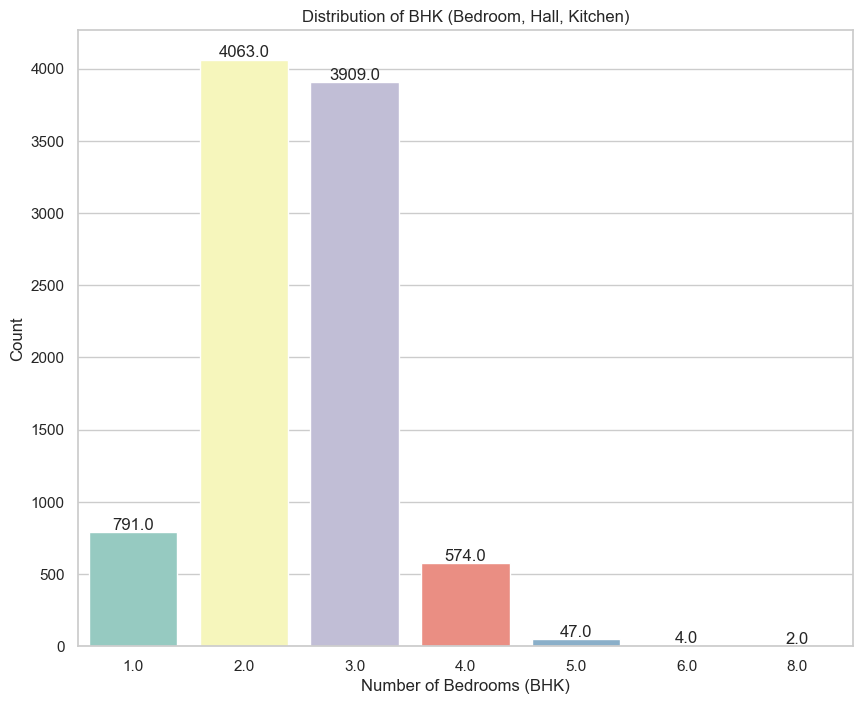

In [35]:
# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='BHK', data=DF, palette="Set3")

# Add labels
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Count")
plt.title("Distribution of BHK (Bedroom, Hall, Kitchen)")

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.show()


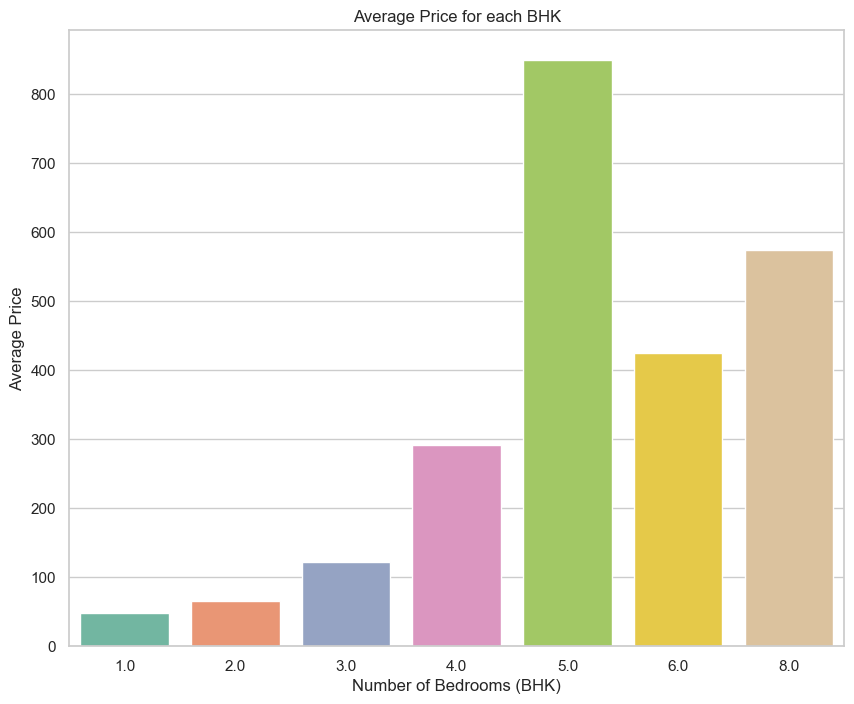

The BHK with the highest average price is:
BHK        5.000000
Price    850.382979
Name: 0, dtype: float64


In [36]:
# Assuming DF is your DataFrame and 'Price' is the column for property price

# Group by BHK and calculate the mean price for each group
bhk_price = DF.groupby('BHK')['Price'].mean().sort_values(ascending=False)

# Reset index for better plotting
bhk_price_df = bhk_price.reset_index()

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='BHK', y='Price', data=bhk_price_df, palette="Set2")

# Add labels and title
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Average Price")
plt.title("Average Price for each BHK")

# Show the plot
plt.show()

# Print the BHK with the highest price
print("The BHK with the highest average price is:")
print(bhk_price_df.iloc[0])


Text(0.5, 1.0, 'Comparision of the prices for different no of bedrooms ')

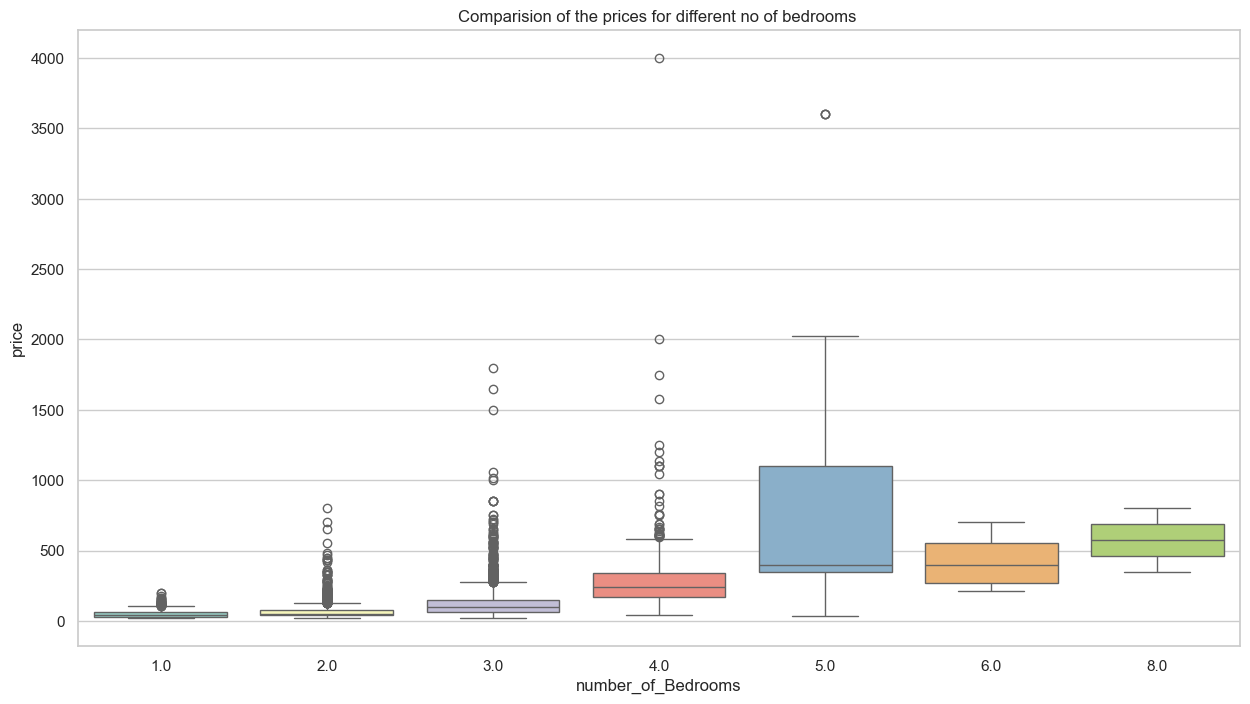

In [37]:
# Comparision of the prices for Bedrooms in house
plt.figure(figsize=(15,8))
sns.boxplot(x="BHK",y="Price",data=DF,palette="Set3")
plt.xlabel("number_of_Bedrooms")
plt.ylabel("price")
plt.title("Comparision of the prices for different no of bedrooms ")

In [38]:
numerical_columns = DF.select_dtypes(include=['number']).columns.tolist()

# Print the numerical columns
print(numerical_columns)

corr = DF[numerical_columns].corr()
corr

['Price', 'total_sqft', 'BHK', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security', 'PowerBackup', 'Parking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'Gasconnection', 'Price_per_sqft', 'Indian_Price']


,Price,total_sqft,BHK,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Security,PowerBackup,Parking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,Gasconnection,Price_per_sqft,Indian_Price
Price,1.000000,0.657287,0.440034,0.123811,0.090190,0.144155,0.160253,0.131138,0.107592,0.138985,...,0.150050,0.159062,0.146754,0.089551,0.087744,0.062339,0.043511,0.178626,0.745643,1.000000
total_sqft,0.657287,1.000000,0.727874,-0.002926,-0.003823,0.276514,0.314224,0.244350,0.257253,0.205960,...,0.187021,0.246137,0.147105,0.133362,0.144011,0.222750,0.012886,0.168467,0.223288,0.657287
BHK,0.440034,0.727874,1.000000,0.002359,-0.089912,0.131463,0.174910,0.129213,0.135064,0.071342,...,0.014806,0.073632,0.016462,0.057150,0.071950,0.123886,-0.022109,0.157129,0.145123,0.440034
Resale,0.123811,-0.002926,0.002359,1.000000,0.254725,-0.150416,-0.219984,-0.124017,-0.161034,-0.017590,...,0.027627,-0.049702,0.068417,0.064410,-0.115963,-0.187988,0.028910,0.244134,0.290663,0.123811
MaintenanceStaff,0.090190,-0.003823,-0.089912,0.254725,1.000000,0.154486,0.099303,0.208811,0.188725,0.340564,...,0.454688,0.249838,0.428108,0.259172,0.203239,0.122699,0.222243,0.002895,0.227292,0.090190
Gymnasium,0.144155,0.276514,0.131463,-0.150416,0.154486,1.000000,0.760032,0.583765,0.632311,0.494650,...,0.537397,0.559362,0.401450,0.336675,0.341146,0.523725,0.168210,0.080589,0.058281,0.144155
SwimmingPool,0.160253,0.314224,0.174910,-0.219984,0.099303,0.760032,1.000000,0.642368,0.684103,0.546218,...,0.519451,0.492781,0.408612,0.399597,0.374200,0.595707,0.178118,0.006645,0.035597,0.160253
LandscapedGardens,0.131138,0.244350,0.129213,-0.124017,0.208811,0.583765,0.642368,1.000000,0.689069,0.591061,...,0.596612,0.427276,0.502315,0.368134,0.346015,0.577012,0.201479,0.033988,0.059568,0.131138
JoggingTrack,0.107592,0.257253,0.135064,-0.161034,0.188725,0.632311,0.684103,0.689069,1.000000,0.637655,...,0.662475,0.429531,0.496136,0.532686,0.397930,0.649131,0.266339,-0.006893,0.009640,0.107592
RainWaterHarvesting,0.138985,0.205960,0.071342,-0.017590,0.340564,0.494650,0.546218,0.591061,0.637655,1.000000,...,0.666174,0.478739,0.551820,0.481311,0.258361,0.557773,0.228073,0.009483,0.126380,0.138985


<Axes: >

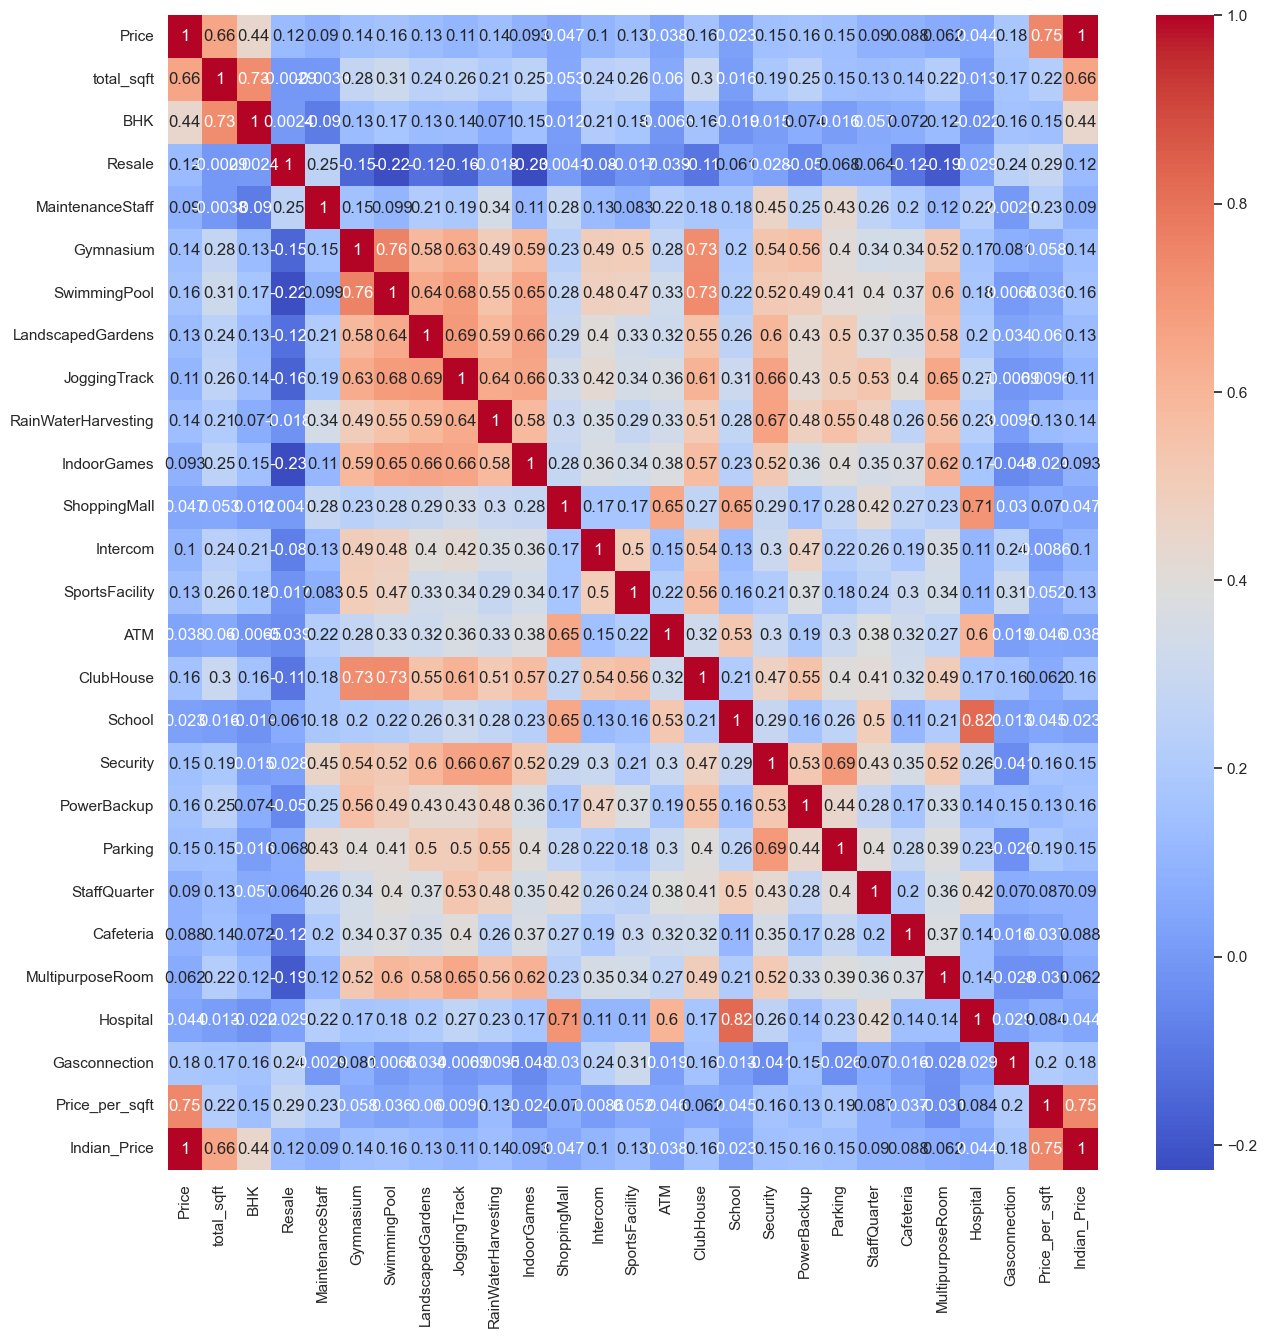

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

 # Checking All outliers

In [41]:
# Function for Checking Outliers
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=DF[i])
        plt.title(i)
        plt.show()

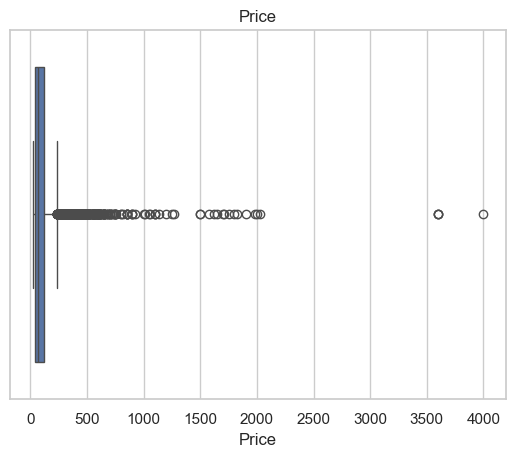

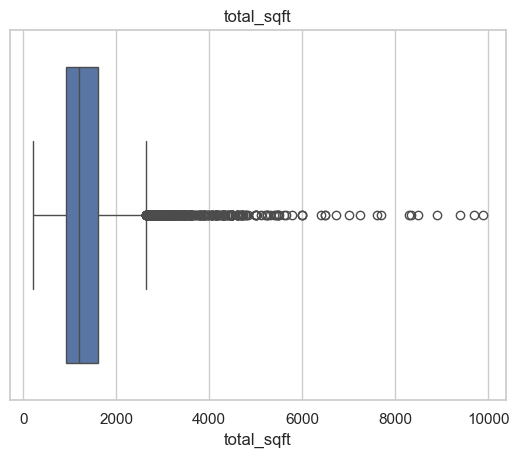

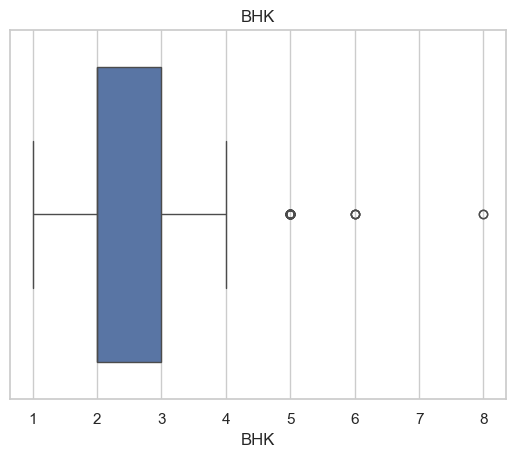

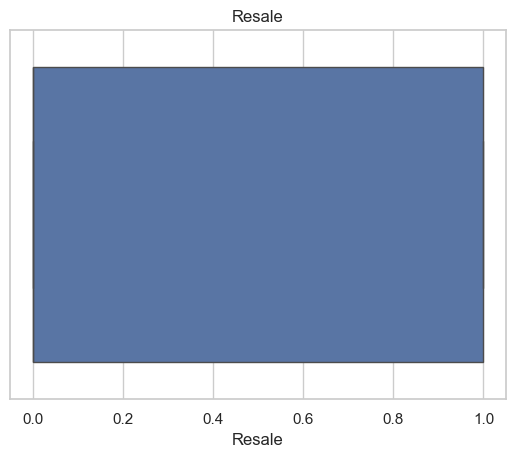

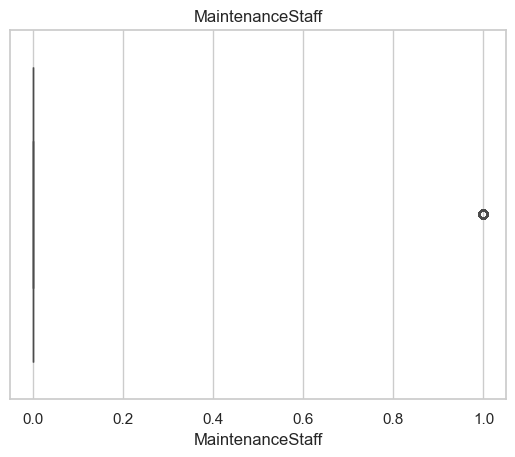

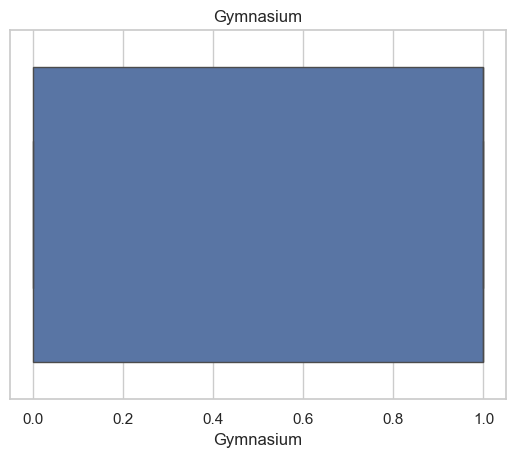

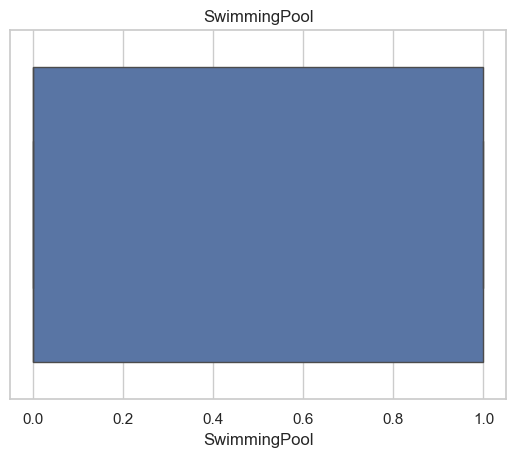

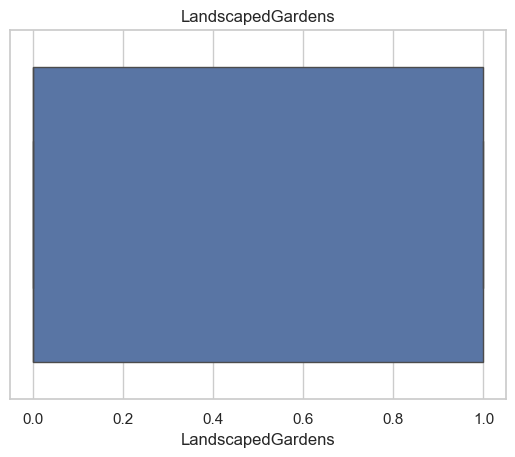

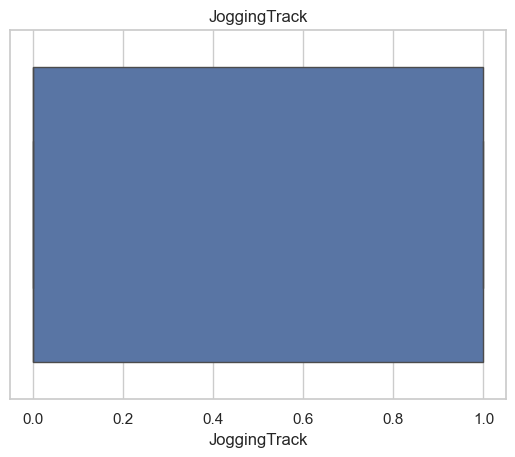

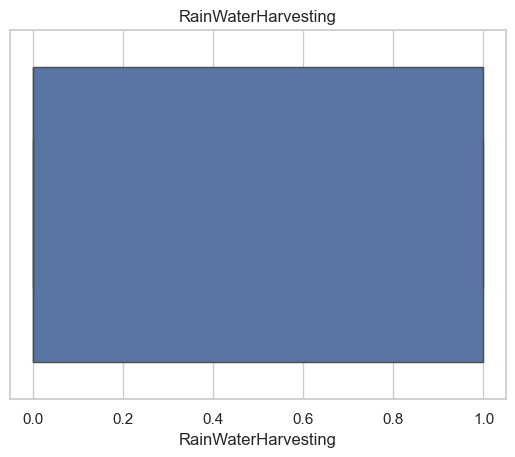

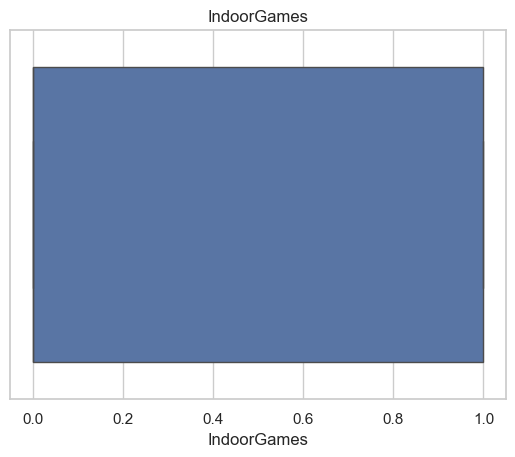

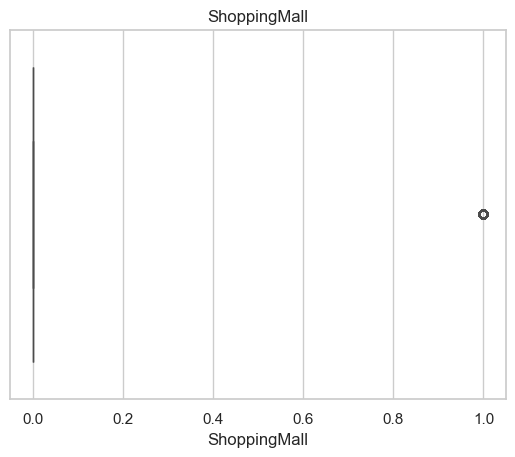

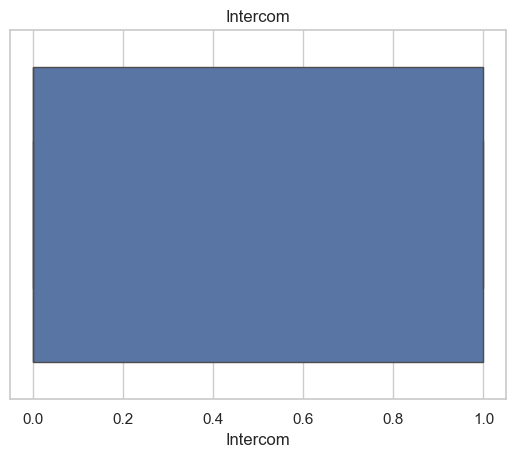

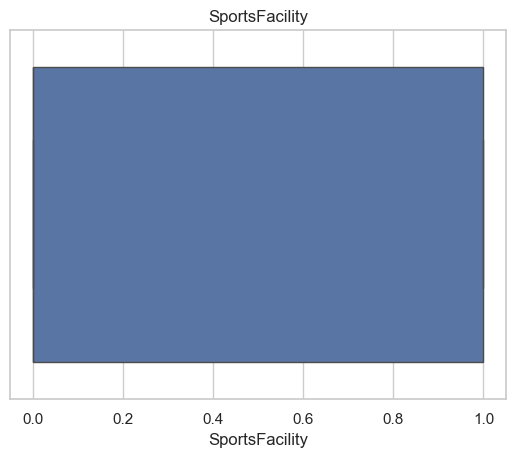

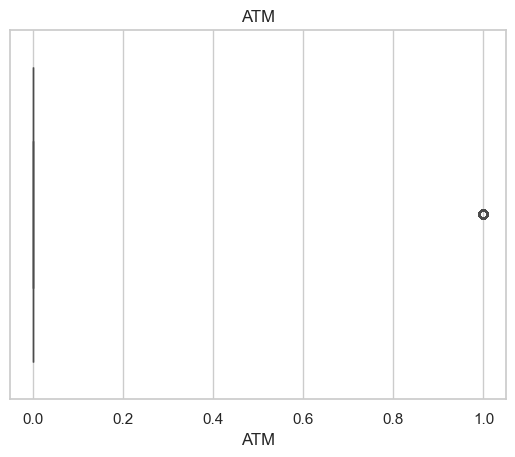

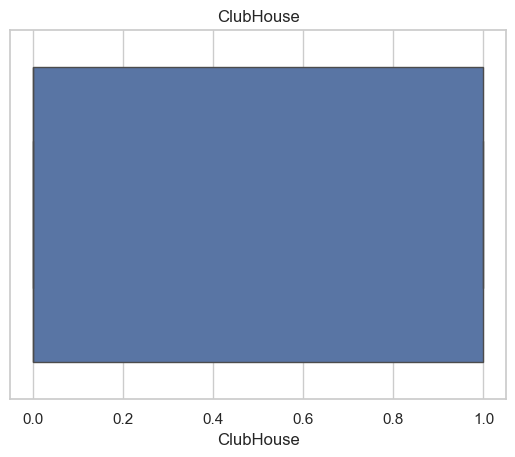

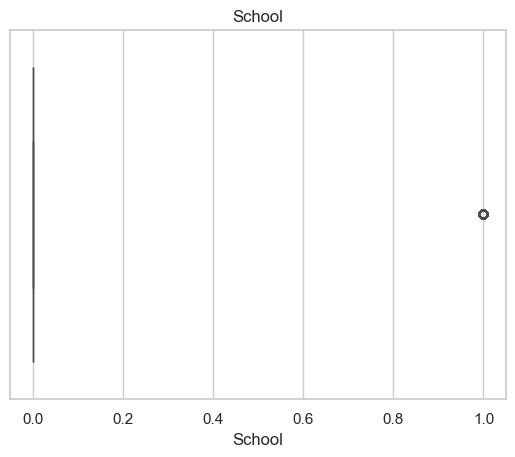

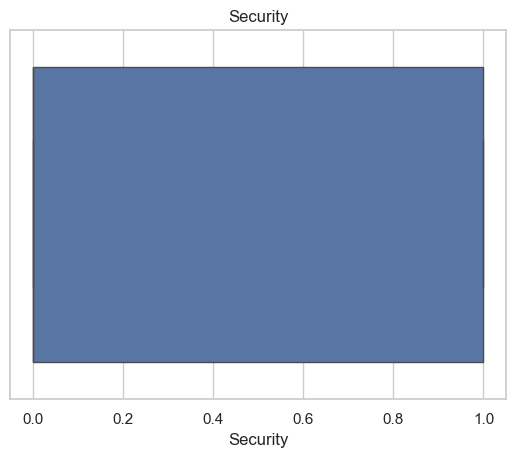

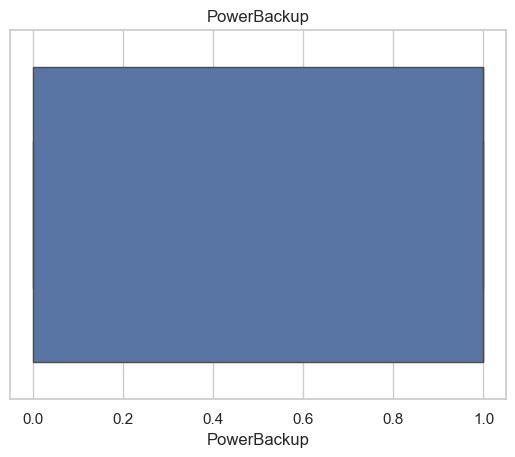

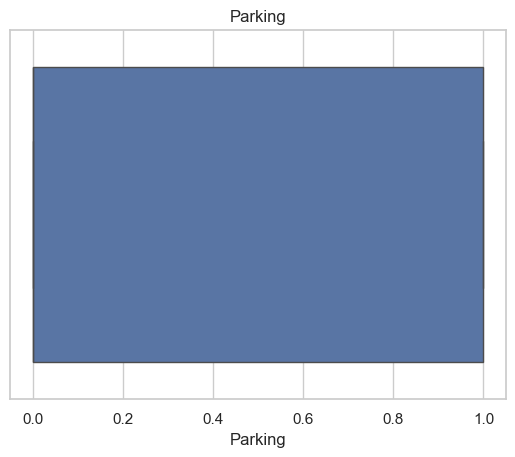

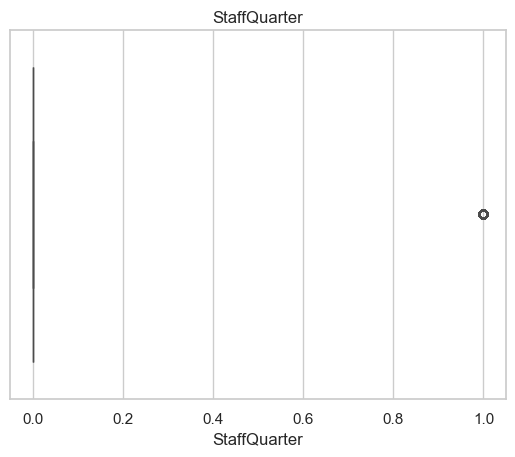

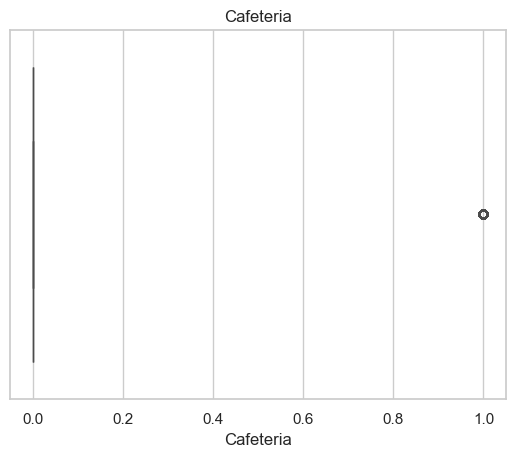

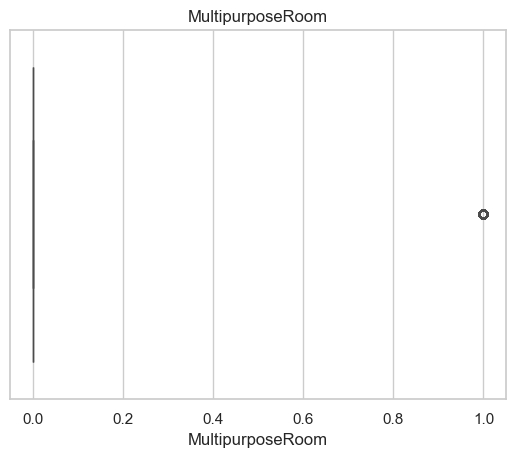

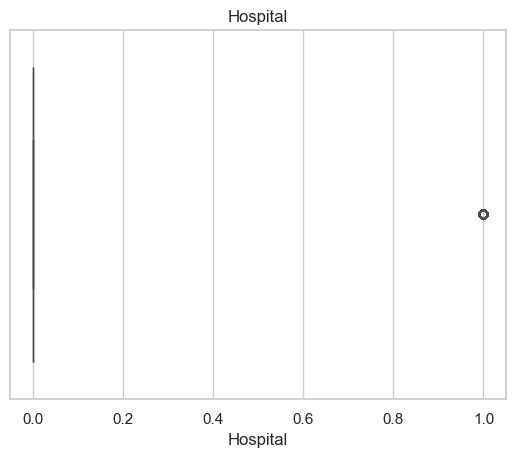

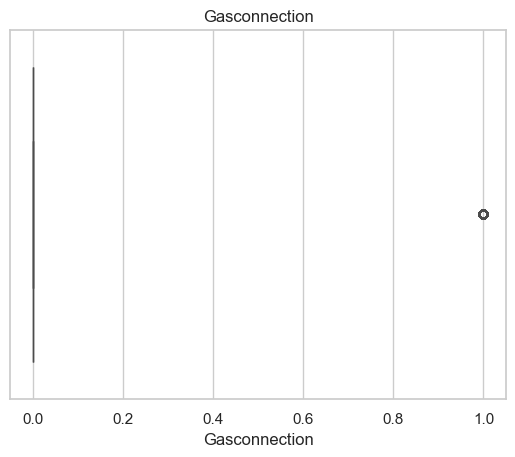

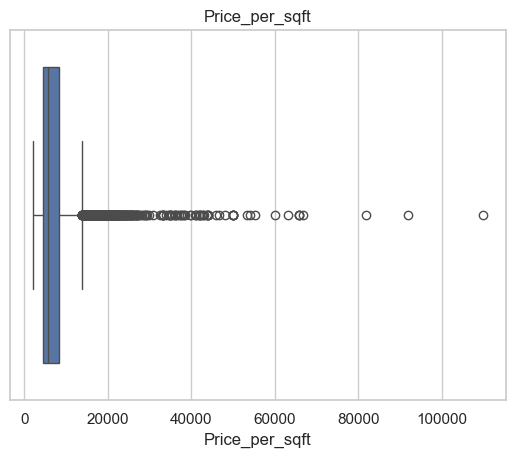

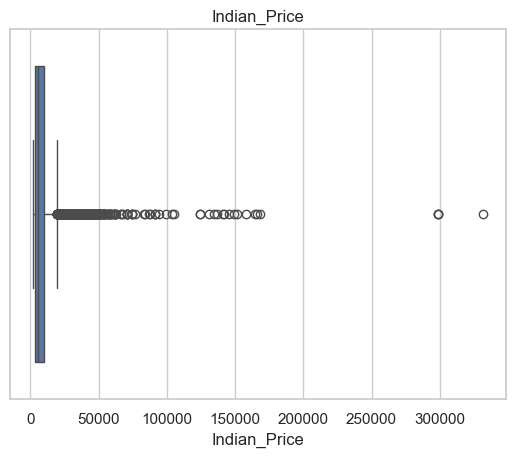

In [42]:
outliers(DF)

# Remove outliers

In [44]:
DF.columns

Index(['Price', 'total_sqft', 'Area', 'BHK', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security',
       'PowerBackup', 'Parking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'City', 'Hospital', 'Gasconnection',
       'Price_per_sqft', 'Indian_Price'],
      dtype='object')

In [45]:
def remove_outliers(DF, column):
    q1 = DF[column].quantile(0.25)
    q3 = DF[column].quantile(0.75)
    IQR = q3 - q1
    low = q1 - (1.5 * IQR)
    high = q3 + (1.5 * IQR)
    
    # Clip the values to the lower and upper bounds
    DF[column] = np.clip(DF[column], low, high)

In [46]:
# As these columns consisted with most outliers
remove_outliers(DF,'Price_per_sqft')
remove_outliers(DF,'Price')
remove_outliers(DF,'total_sqft')
remove_outliers(DF,'Indian_Price')



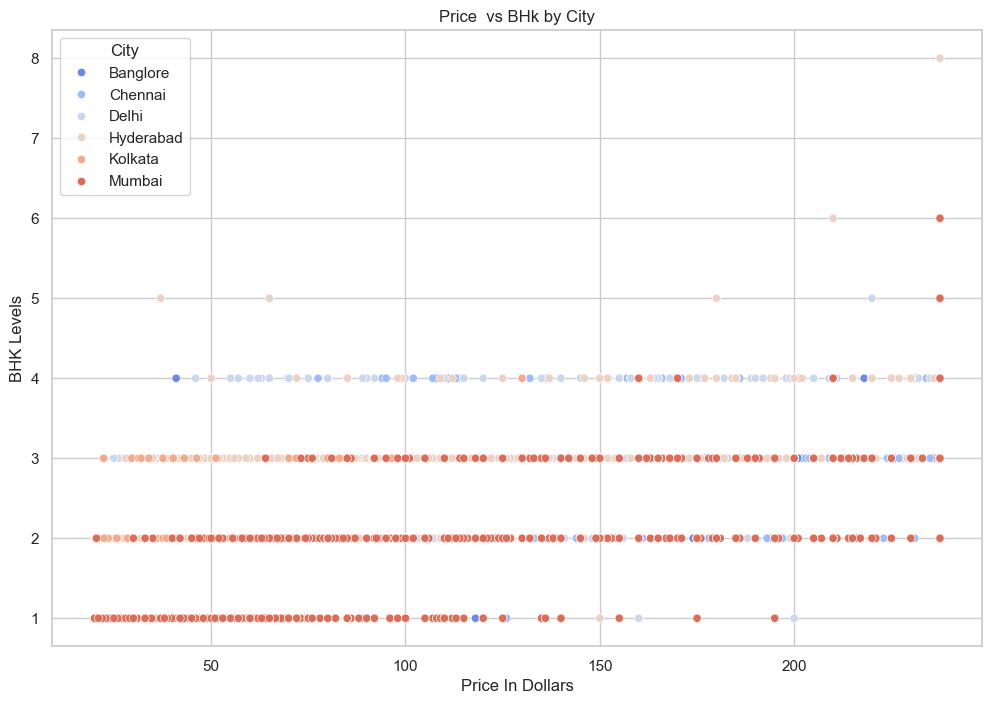

In [47]:

#. Price per square foot analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y='BHK', data=DF, hue='City', palette="coolwarm")
plt.title('Price  vs BHk by City')
plt.xlabel('Price In Dollars')
plt.ylabel('BHK Levels')
plt.show()


# Modelling

In [49]:
DF1=DF.copy()

In [50]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                9390 non-null   float64
 1   total_sqft           9390 non-null   float64
 2   Area                 9390 non-null   object 
 3   BHK                  9390 non-null   float64
 4   Resale               9390 non-null   int64  
 5   MaintenanceStaff     9390 non-null   float64
 6   Gymnasium            9390 non-null   float64
 7   SwimmingPool         9390 non-null   float64
 8   LandscapedGardens    9390 non-null   float64
 9   JoggingTrack         9390 non-null   float64
 10  RainWaterHarvesting  9390 non-null   float64
 11  IndoorGames          9390 non-null   float64
 12  ShoppingMall         9390 non-null   float64
 13  Intercom             9390 non-null   float64
 14  SportsFacility       9390 non-null   float64
 15  ATM                  9390 non-null   f

# Defining_Models 

In [52]:
y=DF1["Indian_Price"]
x=DF1.drop(columns=["Price","City","Area","Indian_Price"])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=88)

### 1. Decision Tree Regressor 
### 2. Random Forest Regression
### 3. Linear Regression

In [55]:
models={"Decision Tree Regressor":DecisionTreeRegressor(),
        "Random Forest Regression":
         RandomForestRegressor(n_estimators=100, random_state=42),
       "Linear Regression":LinearRegression()}

In [56]:
MSE_Results = {}
RMSE_Results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = sqrt(MSE)
    MSE_Results[name] = MSE
    RMSE_Results[name] = RMSE

## PRINT (MSE and RMSE) RESULTS
for name in MSE_Results:
    mse = MSE_Results[name]
    rmse = RMSE_Results[name]
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"{name}: MSE = {mse}, RMSE = {rmse}")

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Decision Tree Regressor: MSE = 12760.33, RMSE = 112.96163065395258
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Regression: MSE = 42991.86133869968, RMSE = 207.34478854965147
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Linear Regression: MSE = 691848.9488659741, RMSE = 831.7745781556287
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Results dictionary

In [58]:
results = {}

# Iterate through models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R-squared": r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Decision Tree Regressor:
MAE: 66.1
MSE: 15208.61
RMSE: 123.32319327685283
R-squared: 0.9992619973736023

Random Forest Regression:
MAE: 70.46395000000004
MSE: 42991.86133869968
RMSE: 207.34478854965147
R-squared: 0.9979138062859338

Linear Regression:
MAE: 617.1197116818485
MSE: 691848.9488659741
RMSE: 831.7745781556287
R-squared: 0.9664278102118782



### Convert results dictionary to DataFrame

In [60]:
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

                                 MAE            MSE        RMSE  R-squared
Decision Tree Regressor    66.100000   15208.610000  123.323193   0.999262
Random Forest Regression   70.463950   42991.861339  207.344789   0.997914
Linear Regression         617.119712  691848.948866  831.774578   0.966428


## -> BEST MODEL

In [62]:
## BEST MODEL
BEST_model= min(MSE_Results,key=MSE_Results.get)
print("--->> BEST MODEL IS ---> > > > ",{BEST_model}) 

--->> BEST MODEL IS ---> > > >  {'Decision Tree Regressor'}


In [63]:
print(x_train.columns)

Index(['total_sqft', 'BHK', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'Security',
       'PowerBackup', 'Parking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'Gasconnection', 'Price_per_sqft'],
      dtype='object')


# ->Model predict

In [65]:
import pandas as pd

# Example input data
input_data = pd.DataFrame({
    'total_sqft': [2000],                      # Total square footage of the house
    'BHK': [3],                                # Number of bedrooms
    'Resale': [1],                             # 1 if it's a resale property, 0 otherwise
    'MaintenanceStaff': [1],                   # 1 if maintenance staff is available, 0 otherwise
    'Gymnasium': [1],                          # 1 if gymnasium is available, 0 otherwise
    'SwimmingPool': [0],                       # 1 if swimming pool is available, 0 otherwise
    'LandscapedGardens': [1],                  # 1 if landscaped gardens are available, 0 otherwise
    'JoggingTrack': [1],                       # 1 if jogging track is available, 0 otherwise
    'RainWaterHarvesting': [0],                # 1 if rainwater harvesting is available, 0 otherwise
    'IndoorGames': [1],                        # 1 if indoor games facilities are available, 0 otherwise
    'ShoppingMall': [1],                       # 1 if shopping mall is nearby, 0 otherwise
    'Intercom': [1],                           # 1 if intercom facility is available, 0 otherwise
    'SportsFacility': [0],                     # 1 if sports facilities are available, 0 otherwise
    'ATM': [1],                                # 1 if ATM is nearby, 0 otherwise
    'ClubHouse': [1],                          # 1 if clubhouse is available, 0 otherwise
    'School': [1],                             # 1 if school is nearby, 0 otherwise
    'Security': [1],                           # 1 if security services are available, else 0
    'PowerBackup': [1],                        # 1 if power backup is available, else 0
    'Parking': [2],                            # Number of parking spaces available
    'StaffQuarter': [0],                       # 1 if staff quarters are available, else 0
    'Cafeteria': [1],                          # 1 if cafeteria is available, else 0
    'MultipurposeRoom': [0],                   # 1 if multipurpose room is available, else 0
    'Hospital': [3],                           # Distance to nearest hospital in kilometers (or other relevant metric)
    'Gasconnection': [1],                      # 1 if gas connection is available, else 0
    'Price_per_sqft': [5000]   
})

# Predict the house price using the Random Forest model
predicted_price_usd = model.predict(input_data)[0]
print("USD Pedicted Prics : ",predicted_price_usd)
# Define the exchange rate (1 USD = 83 INR, example rate)
exchange_rate = 83

# Convert the predicted price from USD to INR
predicted_price_inr = predicted_price_usd * exchange_rate

# Show the predicted price in INR
print("Predicted Price (INR):", round(predicted_price_inr, 4))


USD Pedicted Prics :  10560.602276860654
Predicted Price (INR): 876529.989


In [66]:
#Random forest Regressor 

y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse}")
print(f"R-squared: {r2}")

 RMSE: 831.7745781556287
R-squared: 0.9664278102118782


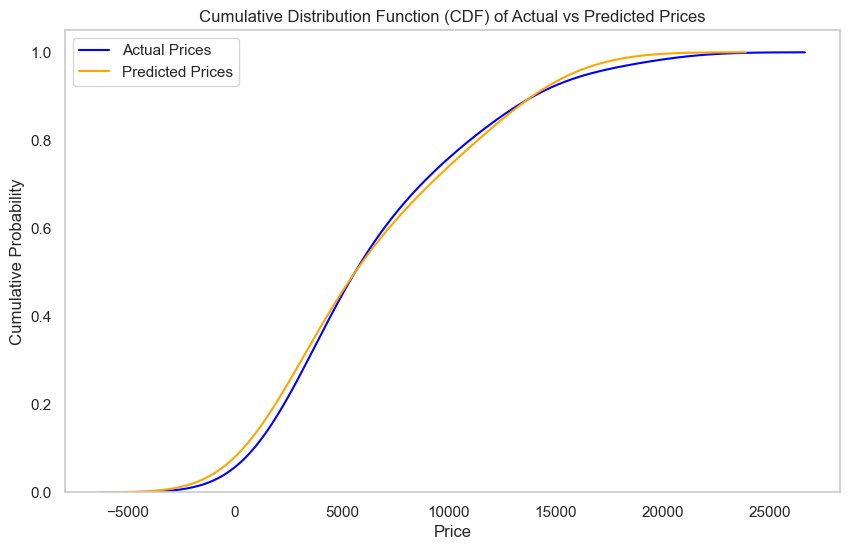

In [67]:
# CDF for actual and predicted prices
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, cumulative=True, label='Actual Prices', color='blue')
sns.kdeplot(y_pred, cumulative=True, label='Predicted Prices', color='orange')
plt.title('Cumulative Distribution Function (CDF) of Actual vs Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()